In [30]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [31]:
df = pd.read_csv("height-weight-25k.csv")
df.head()

,Index,Height-Inches,Weight-Pounds
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [32]:
df.describe()

,Index,Height-Inches,Weight-Pounds
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [33]:
y = df['Weight-Pounds'].values # Target
y = y.reshape(-1, 1)
X = df['Height-Inches'].values # Feature 
X = X.reshape(-1, 1)

In [34]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20000, 1) (20000, 1)
(5000, 1) (5000, 1)


In [35]:
y.shape

(25000, 1)

In [36]:
# train data
x_train = np.array(X_train, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
y_train = np.array(y_train, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
# test data
x_test = np.array(X_test, dtype=np.float32)
x_test = x_test.reshape(-1, 1)
y_test = np.array(y_test, dtype=np.float32)
y_test = y_test.reshape(-1, 1)

In [37]:
# model
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
    
    def forward(self, x): 
        out = self.linear(x) 
        return out

In [38]:
# model with CUDA
inputDim = 1 # x 
outputDim = 1 # y 
learningRate = 0.0001
epochs = 1000
model = linearRegression(inputDim, outputDim)
model.cuda()

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [39]:
# SGD and loss function
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [40]:
# training
for epoch in range(epochs):
  inputs = Variable(torch.from_numpy(x_train).cuda()) 
  labels = Variable(torch.from_numpy(y_train).cuda()) 
  optimizer.zero_grad()
  outputs = model(inputs)
  loss = criterion(outputs, labels)
  print(loss)
  # get gradients
  loss.backward()
  # update parameters
  optimizer.step()
  print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(25582.7363, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 0, loss 25582.736328125
tensor(249.1567, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 1, loss 249.1566619873047
tensor(108.1178, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 2, loss 108.11781311035156
tensor(107.3326, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 3, loss 107.33259582519531
tensor(107.3282, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 4, loss 107.3282241821289
tensor(107.3282, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 5, loss 107.32819366455078
tensor(107.3282, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 6, loss 107.32819366455078
tensor(107.3282, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 7, loss 107.32819366455078
tensor(107.3282, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 8, loss 107.32818603515625
tensor(107.3282, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 9, loss 107.32819366455078
tensor(107.3282, device='cuda:0', grad_fn=<MseLossBackward>)
ep

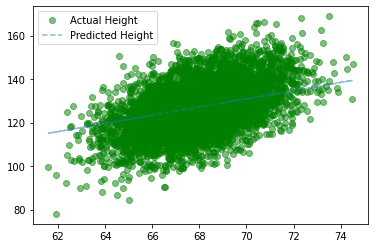

In [42]:
# plot predicted versus actual
with torch.no_grad(): 
  predicted = model(Variable(torch.from_numpy(x_test).cuda())).cpu().data.numpy()

plt.clf()
plt.plot(x_test, y_test, 'go', label='Actual Height', alpha=0.5)
plt.plot(x_test, predicted, '--', label='Predicted Height', alpha=0.5)
plt.legend(loc='best')

In [43]:
#RMSE Root Mean Squared Error
rms = math.sqrt(mean_squared_error(x_test, predicted))
rms

59.19298169573189